# Notebook Setup

In [1]:
# !python

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# Standard imports
import os

# Third-party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Local imports

In [4]:
sns.set()

# Load Data
Let's load the Iris Flower Dataset using scikit-learn's built-in datasets.

In [5]:
# datasets.load_iris?

In [6]:
data = datasets.load_iris()

In [7]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
data['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [10]:
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# What problem are we trying to solve?
We are trying to use attributes of flowers to predict the species of the flower. Specifically, we are trying to use the sepal legth and width, and the petal length and width to predict if an Iris flower is of type Setosa, Versicolor, or Virginica.

This is a multiclass classification problem.

# Create a Pandas DataFrame from the data
We could do our full analysis using Numpy and Numpy arrays, but we'll create a Pandas DataFrame because it makes some things simpler, and also to get some practice using Pandas

In [13]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])

In [14]:
df['target'] = data['target']

In [15]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Basic descriptive statistics

In [16]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Distributions of features and target

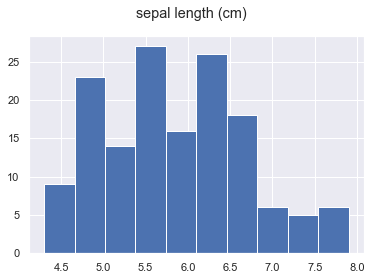

In [17]:
col = 'sepal length (cm)'
df[col].hist()
plt.suptitle(col)
plt.show()

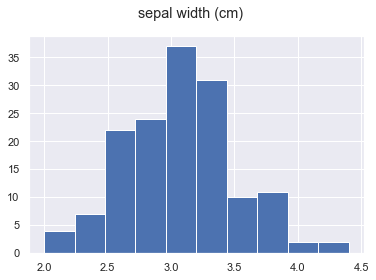

In [18]:
col = 'sepal width (cm)'
df[col].hist()
plt.suptitle(col)
plt.show()

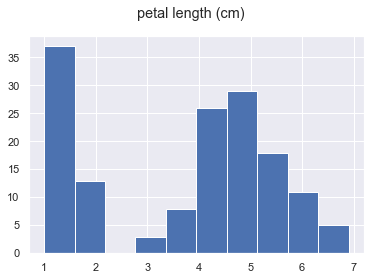

In [19]:
col = 'petal length (cm)'
df[col].hist()
plt.suptitle(col)
plt.show()

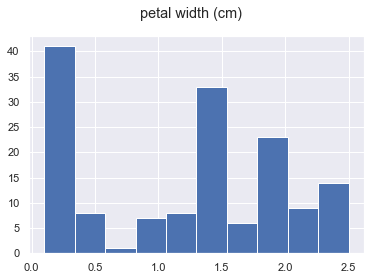

In [20]:
col = 'petal width (cm)'
df[col].hist()
plt.suptitle(col)
plt.show()

# Relationship of the data features with the target

In [21]:
# create new column with the species name
df['target_name'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

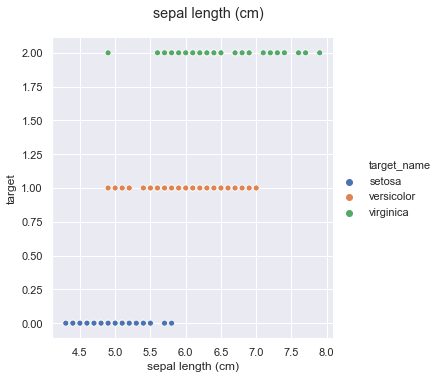

In [22]:
col = 'sepal length (cm)'
sns.relplot(x=col, y='target', hue='target_name', data=df)
_=plt.suptitle(col, y=1.05)

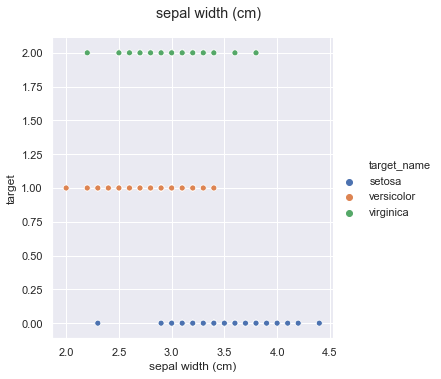

In [23]:
col = 'sepal width (cm)'
sns.relplot(x=col, y='target', hue='target_name', data=df)
_=plt.suptitle(col, y=1.05)

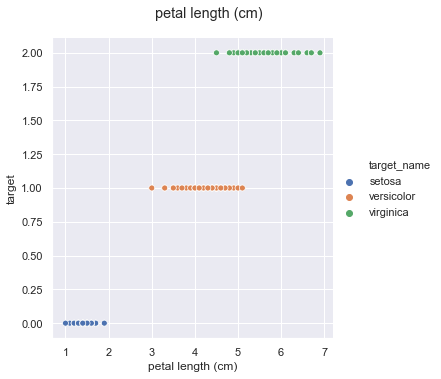

In [24]:
col = 'petal length (cm)'
sns.relplot(x=col, y='target', hue='target_name', data=df)
_=plt.suptitle(col, y=1.05)

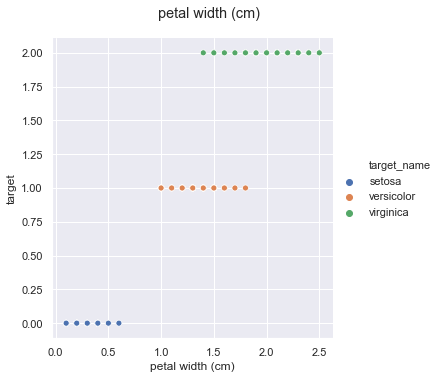

In [25]:
col = 'petal width (cm)'
sns.relplot(x=col, y='target', hue='target_name', data=df)
_=plt.suptitle(col, y=1.05)

# Exploratory Data Analysis (EDA) - Pairplots

C:\Users\patel\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\patel\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


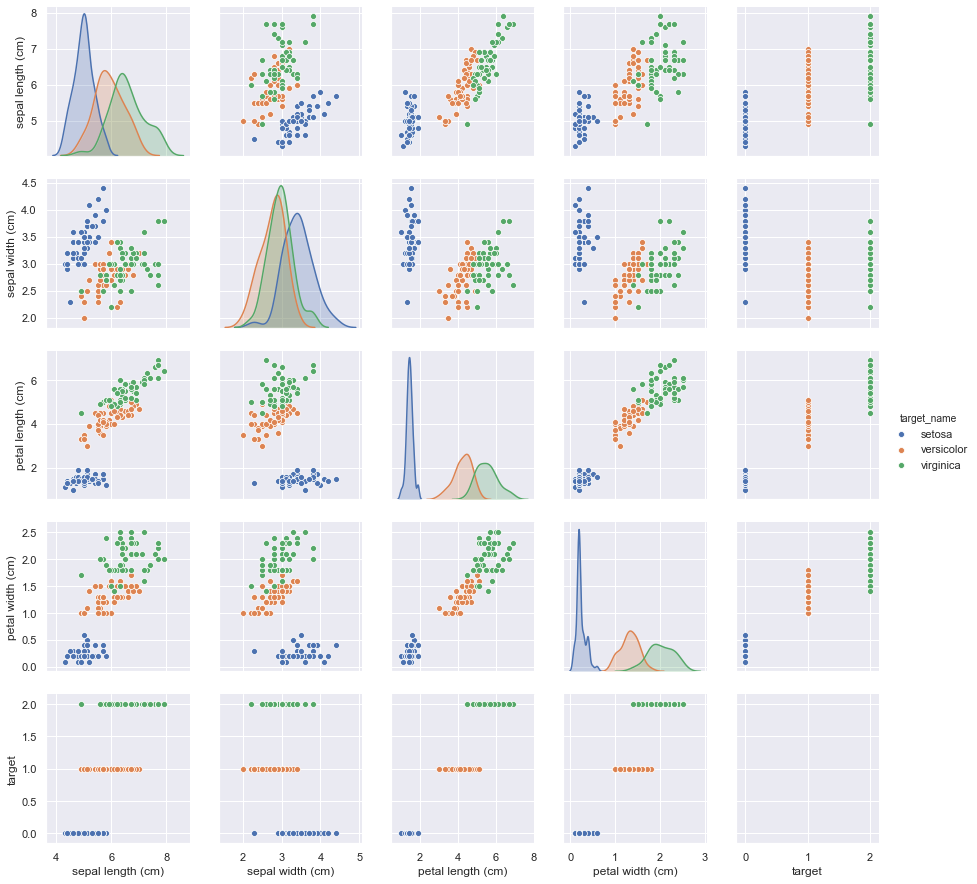

In [26]:
sns.pairplot(df, hue='target_name')

# Train Test Split
You always want to evaluate your final model on a test set that hasn't been used at all in the training process. So we'll split off a test set here.

_(Note: This might be a little less true if you use cross-validation, but is still considered a best practice.)_

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
df_train, df_test = train_test_split(df, test_size=0.25)

In [29]:
df_train.shape

(112, 6)

In [30]:
df_test.shape

(38, 6)

In [31]:
df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
97,6.2,2.9,4.3,1.3,1,versicolor
18,5.7,3.8,1.7,0.3,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
89,5.5,2.5,4.0,1.3,1,versicolor
149,5.9,3.0,5.1,1.8,2,virginica


# Prepare our data for modeling
This involves splitting the data back out into plain Numpy arrays

In [32]:
x_train = df_train.drop(columns=['target', 'target_name']).values
y_train = df_train['target'].values

# Modeling - What is our baseline?

What is the simplest model we can think of?

In this case, if our baseline model is just randomly guessing the species of flower, or guessing a single species for every data point, we could expect to have a model accuracy of 0.33(33%), since we have 3 different classes that are evenly balanced.

So our models shoud at least beat 33% accuracy

# Modeling - Simple manual model

Let's manually look at our data and decide some cutoff points for classification.

In [33]:
def single_feature_prediction(petal_length):
    '''Predicts the Iris species given the petal length'''
    if petal_length < 2.5:
        return 0
    elif petal_length < 4.8:
        return 1
    else:
        return 2

In [34]:
x_train[:, 2]

array([4.3, 1.7, 1.4, 4. , 5.1, 1.2, 3.6, 1.9, 3.5, 1.4, 6.1, 5.3, 4. ,
       1.4, 5.5, 4.7, 4.5, 3.9, 1.4, 3.9, 4.5, 5.7, 4.7, 1.3, 4.2, 1.4,
       3.8, 4.5, 4.1, 5.7, 6. , 1.3, 6.7, 3.9, 1.2, 1.6, 5.4, 1.5, 5.5,
       5.3, 4.6, 4.9, 4.9, 1.4, 1.7, 4.4, 5.1, 1.3, 5.6, 3. , 6.6, 4.9,
       1.5, 5.6, 5. , 4. , 4.9, 4.8, 5.2, 1.5, 4.6, 4. , 5.8, 4.2, 1.6,
       1.3, 4.8, 5.1, 6.4, 3.3, 4.4, 1.6, 4.2, 1.3, 4.4, 6. , 4.7, 5.9,
       3.7, 5.8, 4.9, 1.6, 1.5, 5.4, 5.1, 4.7, 4.5, 4. , 4.6, 1.7, 1.5,
       1.5, 4.2, 1.4, 1.5, 4.5, 5.1, 1.4, 5.7, 1.6, 1. , 4.5, 6.1, 5.1,
       4.1, 5.1, 5.6, 5. , 5.2, 1.6, 1.6, 1.3])

In [35]:
manual_y_predictions = np.array([single_feature_prediction(val) for val in x_train[:, 2]])

In [36]:
manual_model_accuracy = np.mean(manual_y_predictions == y_train)

In [37]:
print(f"Manual model accuracy: {manual_model_accuracy * 100:.2f}")

Manual model accuracy: 96.43


# Modeling - Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

Using a validation set to evaluate our model

In [39]:
model = LogisticRegression(max_iter=200)

In [40]:
# xt stands for 'x_train' and xv stands for 'x_validation'
xt, xv, yt, yv = train_test_split(x_train, y_train, test_size=0.25)

In [41]:
model.fit(xt, yt)

C:\Users\patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
y_pred = model.predict(xv)

In [43]:
np.mean(y_pred == yv)

0.9642857142857143

In [44]:
model.score(xv, yv)

0.9642857142857143

Using cross-validation to evaluate our model

In [45]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [46]:
model = LogisticRegression(max_iter=200)

In [47]:
accuracies = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')

C:\Users\patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

In [48]:
np.mean(accuracies)

0.9541125541125541

# Where are we misclassifying points?

In [49]:
y_pred = cross_val_predict(model, x_train, y_train, cv=5)

C:\Users\patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

In [50]:
predicted_correctly_mask = y_pred == y_train

In [51]:
not_predicted_correctly = ~predicted_correctly_mask

In [52]:
x_train[not_predicted_correctly]

array([[5.9, 3.2, 4.8, 1.8],
       [7.2, 3. , 5.8, 1.6],
       [6.3, 3.3, 4.7, 1.6],
       [5.4, 3. , 4.5, 1.5],
       [6.3, 2.8, 5.1, 1.5]])

In [53]:
df_predictions = df_train.copy()

In [54]:
df_predictions['correct_prediction'] = predicted_correctly_mask

In [55]:
df_predictions['prediction'] = y_pred

In [60]:
df_predictions['prediction_label'] = df_predictions['prediction'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [61]:
df_predictions.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,correct_prediction,prediction,predicition_label,prediction_label
97,6.2,2.9,4.3,1.3,1,versicolor,True,1,versicolor,versicolor
18,5.7,3.8,1.7,0.3,0,setosa,True,0,setosa,setosa
6,4.6,3.4,1.4,0.3,0,setosa,True,0,setosa,setosa
89,5.5,2.5,4.0,1.3,1,versicolor,True,1,versicolor,versicolor
149,5.9,3.0,5.1,1.8,2,virginica,True,2,virginica,virginica


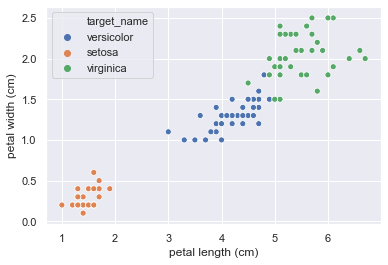

In [62]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='target_name', data=df_predictions)

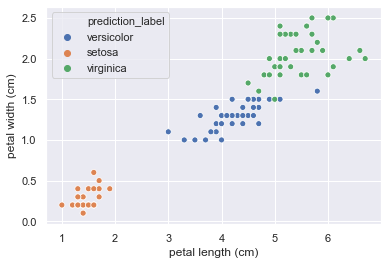

In [63]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='prediction_label', data=df_predictions)

In [77]:
def plot_incorrect_predictions(df_predictions, x_axis_feature, y_axis_feature):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs = axs.flatten()
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue='prediction_label', data=df_predictions, ax=axs[0])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue='target_name', data=df_predictions, ax=axs[1])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue='correct_prediction', data=df_predictions, ax=axs[2])
    axs[3].set_visible(False)
    
    plt.show()

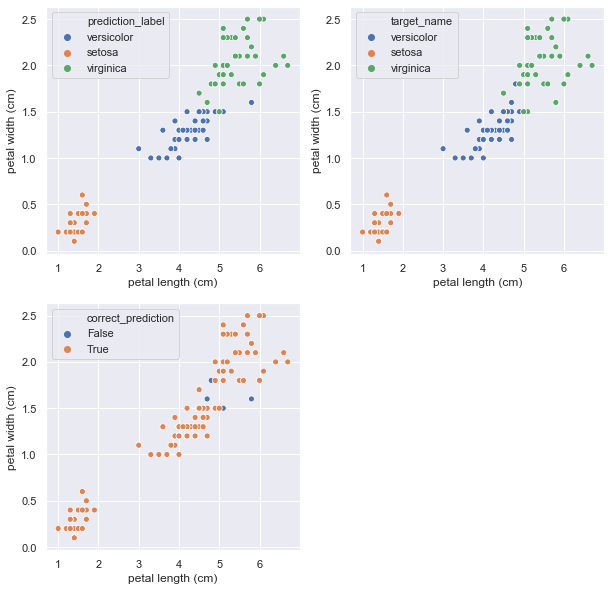

In [78]:
plot_incorrect_predictions(df_predictions, 'petal length (cm)', 'petal width (cm)')

# Model Tuning

What is model tuning?

Model tuning is trying to determine the parameters of your model (these are also known as 'hyperparameters') that maximize the model performance.

In [94]:
for reg_param in (1, 1.3, 2, 5, 10, 100):
    print(reg_param)
    model = LogisticRegression(max_iter=200, C=reg_param)
    accuracies = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    print(f"Accuracy: {np.mean(accuracies) * 100:.2f}")

1
Accuracy: 95.41
1.3
Accuracy: 95.41
2
Accuracy: 96.32
5
Accuracy: 96.32
10
Accuracy: 96.32
100
Accuracy: 96.40


C:\Users\patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

# Final Model

In [95]:
model = LogisticRegression(max_iter=200, C=2)

# How well does our model do on the Test Set?

In [96]:
x_test = df_test.drop(columns=['target', 'target_name']).values
y_test = df_test['target'].values

In [97]:
x_test.shape

(38, 4)

In [98]:
y_test

array([1, 2, 2, 1, 1, 0, 1, 0, 0, 2, 2, 0, 2, 1, 2, 2, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 0, 1, 2, 2, 2, 0])

### Train our final model using our full Training Dataset

In [99]:
model.fit(x_train, y_train)

C:\Users\patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
y_test_pred = model.predict(x_test)

In [103]:
test_set_correctly_classified = y_test_pred == y_test
test_set_accuracy = np.mean(test_set_correctly_classified)

In [105]:
print(f'Test set accuracy: {test_set_accuracy * 100:.2f}')

Test set accuracy: 94.74


In [106]:
test_set_correctly_classified

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [107]:
df_predictions_test = df_test.copy()
df_predictions_test['correct_prediction'] = test_set_correctly_classified
df_predictions_test['prediction'] = y_test_pred
df_predictions_test['prediction_label'] = df_predictions_test['prediction'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [108]:
df_predictions_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,correct_prediction,prediction,prediction_label
93,5.0,2.3,3.3,1.0,1,versicolor,True,1,versicolor
118,7.7,2.6,6.9,2.3,2,virginica,True,2,virginica
138,6.0,3.0,4.8,1.8,2,virginica,True,2,virginica
76,6.8,2.8,4.8,1.4,1,versicolor,True,1,versicolor
66,5.6,3.0,4.5,1.5,1,versicolor,False,2,virginica


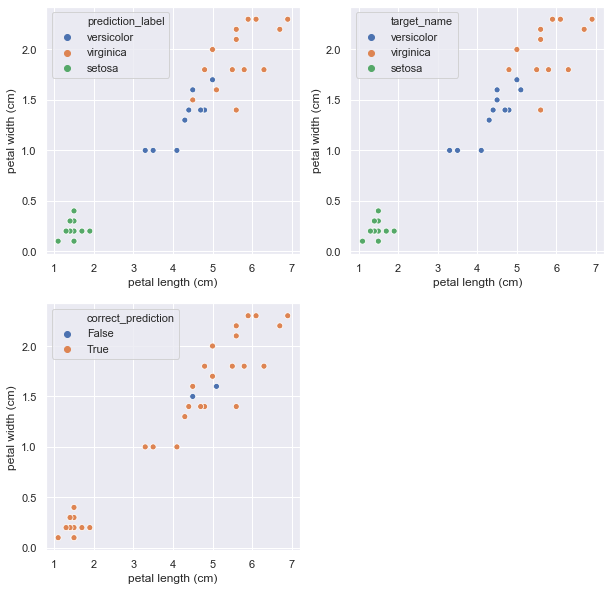

In [109]:
plot_incorrect_predictions(df_predictions_test, x_axis_feature='petal length (cm)', y_axis_feature='petal width (cm)')

# In Conclusion...

In conclusion, we achieved a 95% accuracy on the test dataset using a Logistic Regression with these model parameters:
```
LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
```